In [1]:
import pandas as pd

user_activity = pd.read_csv("Downloads/app_users.csv", index_col=0)
user_activity.head()

,visit_per_month,use_time
0,14,22.8
1,32,13.6
2,8,3.1
3,13,5.7
4,19,20.8


<AxesSubplot:xlabel='visit_per_month', ylabel='use_time'>

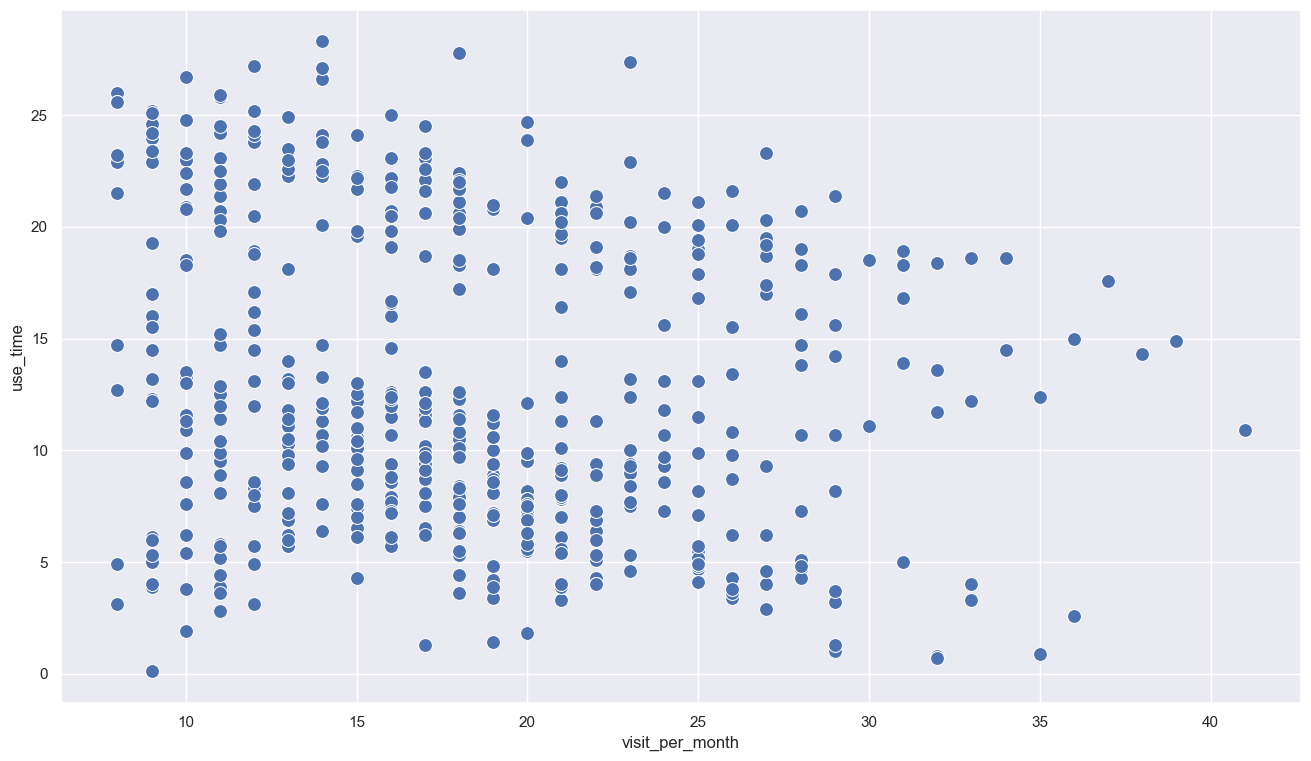

In [2]:
import seaborn as sns

sns.set(style='darkgrid',
        rc={'figure.figsize':(16, 9)})

# 시각화
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')


In [3]:
#데이터가 너무 골고루 퍼져있다

In [4]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=123)
model.fit(user_activity)

# 클러스터 구분
user_activity['label'] = model.predict(user_activity)

# 클러스터별 속한 유저 수
user_activity.groupby('label').count()

,visit_per_month,use_time
label,,
0,228,228
1,146,146
2,126,126


<AxesSubplot:xlabel='visit_per_month', ylabel='use_time'>

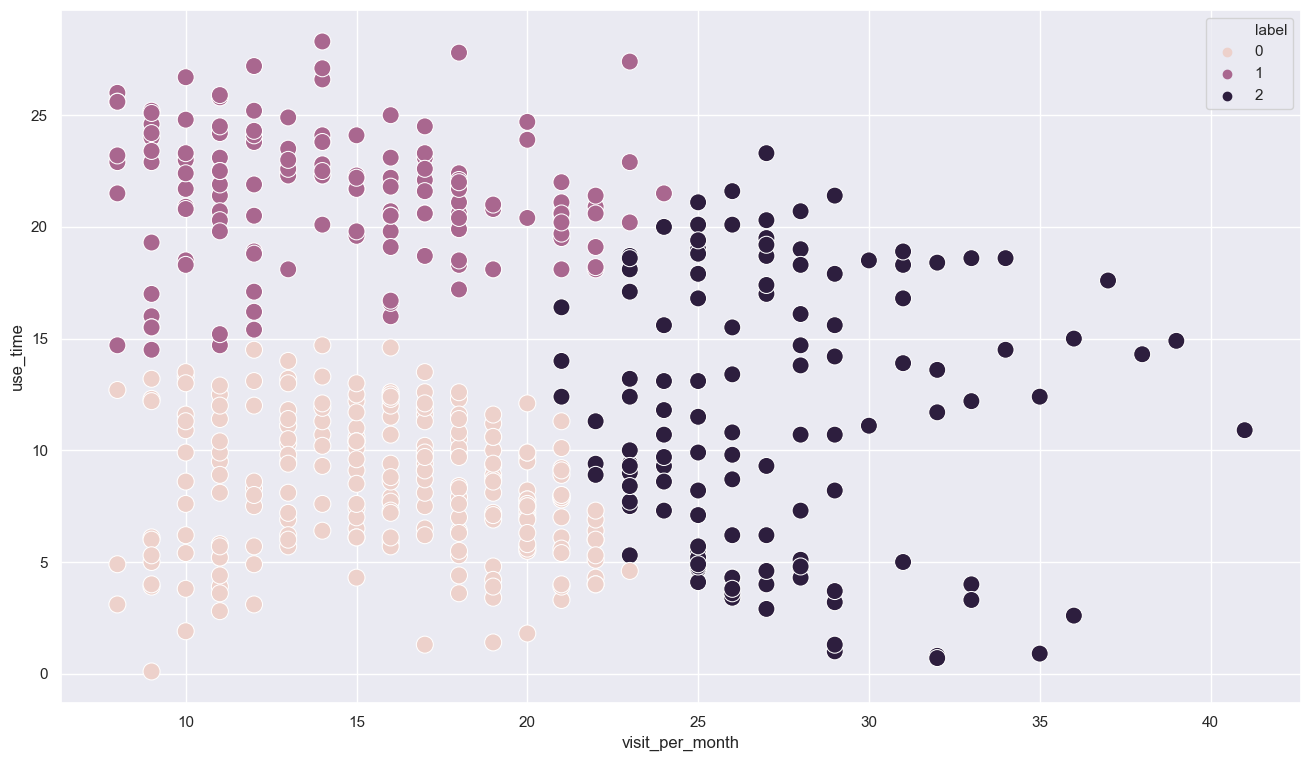

In [5]:
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, hue=user_activity['label'], s = 150)

# ---------------------------------------------------------------

In [6]:
import pandas as pd

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
#pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('Downloads/sales_data.csv', index_col=['customer_id'])

sales_df
#customer_id 고객번호
#total_buy_cnt 총 구매 수량
#total_price  총 구매 금액

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750
...,...,...
18144,30,90750
18168,243,1533530
18225,1,91430


<AxesSubplot:xlabel='total_buy_cnt', ylabel='total_price'>

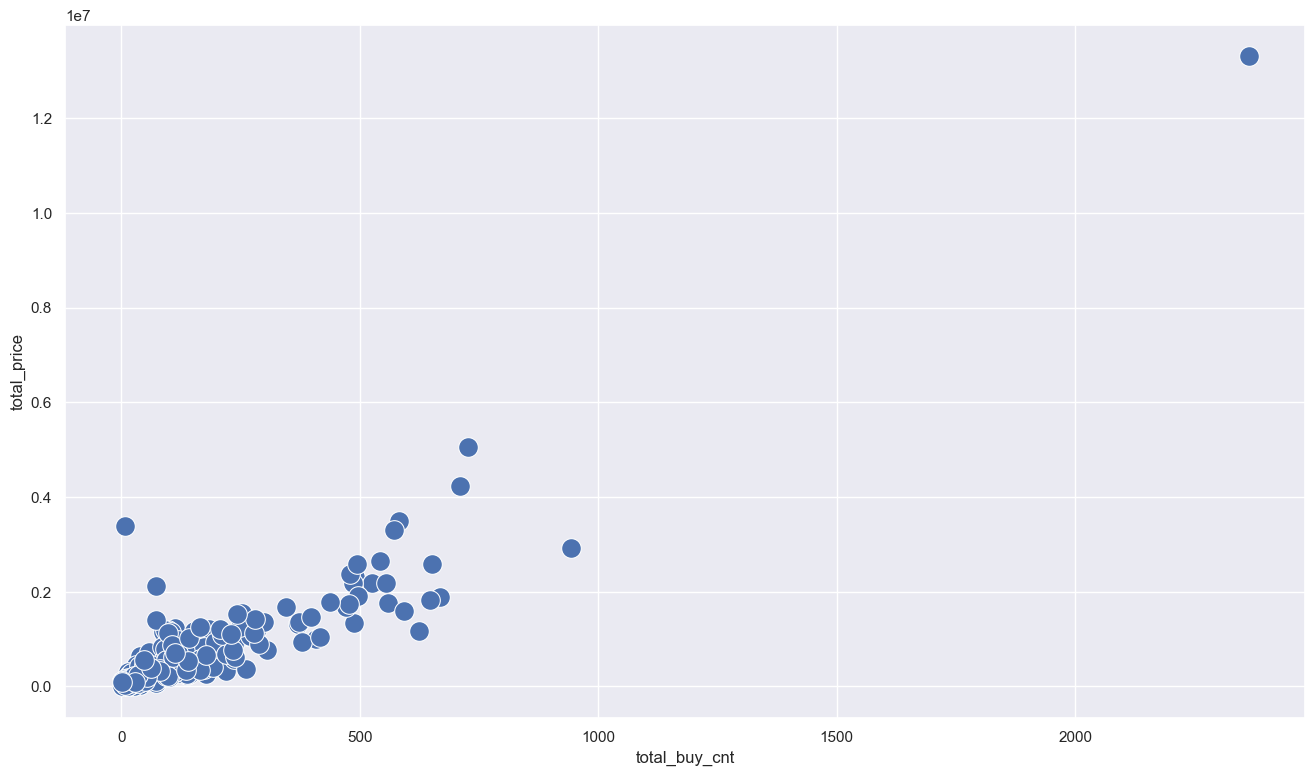

In [7]:
import seaborn as sns

sns.set(style="darkgrid",
        rc={'figure.figsize':(16,9)})

# 데이터 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)
#아주 큰 값을 가진 데이터가 하나 보인다
#이런 이상치는 결과에 영향을 끼치므로 제거하자
#IQR 방법(데이터 클리닝 : 정확성) 부분


In [8]:
def get_outlier_mask(df, weight=1.5):   
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    IQR_weight = IQR * weight

    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight

    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)

    return is_outlier

<AxesSubplot:xlabel='total_buy_cnt', ylabel='total_price'>

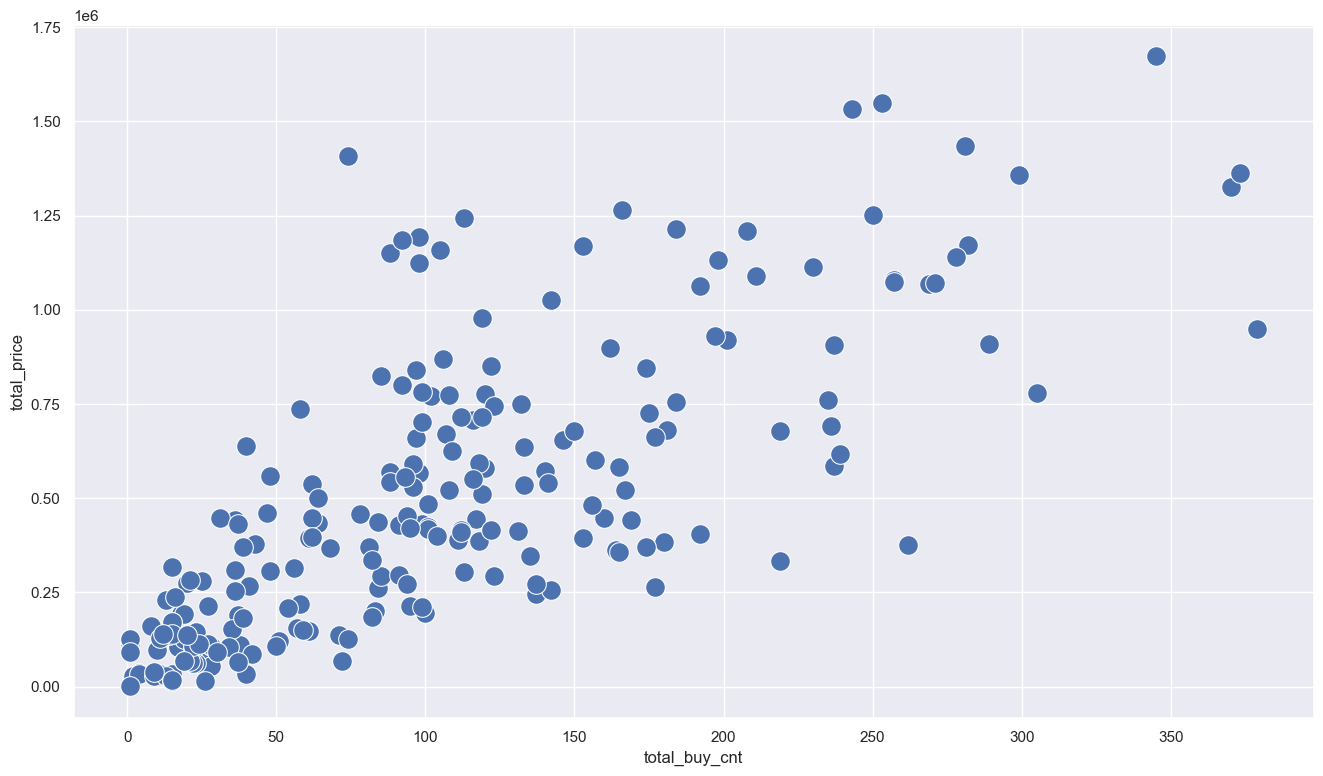

In [9]:
outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)

# 아웃라이어 제거한 데이터 프레임만 추가
sales_df = sales_df[~outlier_idx_cust_df]

# 아웃라이어 제거한 데이터프레임 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

In [10]:
df_mean = sales_df.mean()  # 각 컬럼의 평균값
df_std = sales_df.std()  # 각 컬럼의 표준편차

scaled_df = (sales_df - df_mean)/df_std  # 컬럼별 표준화 진행 

scaled_df.columns = ['total_buy_cnt', 'total_price']

# 인덱스 설정
scaled_df.index = sales_df.index 

scaled_df

,total_buy_cnt,total_price
customer_id,,
12395,-0.053089,-0.151490
12427,-0.065204,0.205968
12431,0.225548,0.950207
12471,-1.131295,-1.024394
12472,-0.186351,0.212084
...,...,...
18144,-0.889001,-1.042771
18168,1.691423,2.744923
18225,-1.240327,-1.040985


In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=123)
#n_cluster와 random_state가 사용됐는데
#n_cluster은 클러스터를 몇개로 나눌지, k를 몇으로 결정하는 파라미터

In [12]:
model.fit(scaled_df)

KMeans(n_clusters=2, random_state=123)

In [13]:
scaled_df['label'] = model.predict(scaled_df)

scaled_df

#데이터프레임에 lable이라는 열을 추가하여 어떤 클러스터로 구분되었는지 표시한다

,total_buy_cnt,total_price,label
customer_id,,,
12395,-0.053089,-0.151490,0
12427,-0.065204,0.205968,0
12431,0.225548,0.950207,1
12471,-1.131295,-1.024394,0
12472,-0.186351,0.212084,0
...,...,...,...
18144,-0.889001,-1.042771,0
18168,1.691423,2.744923,1
18225,-1.240327,-1.040985,0


<AxesSubplot:xlabel='total_buy_cnt', ylabel='total_price'>

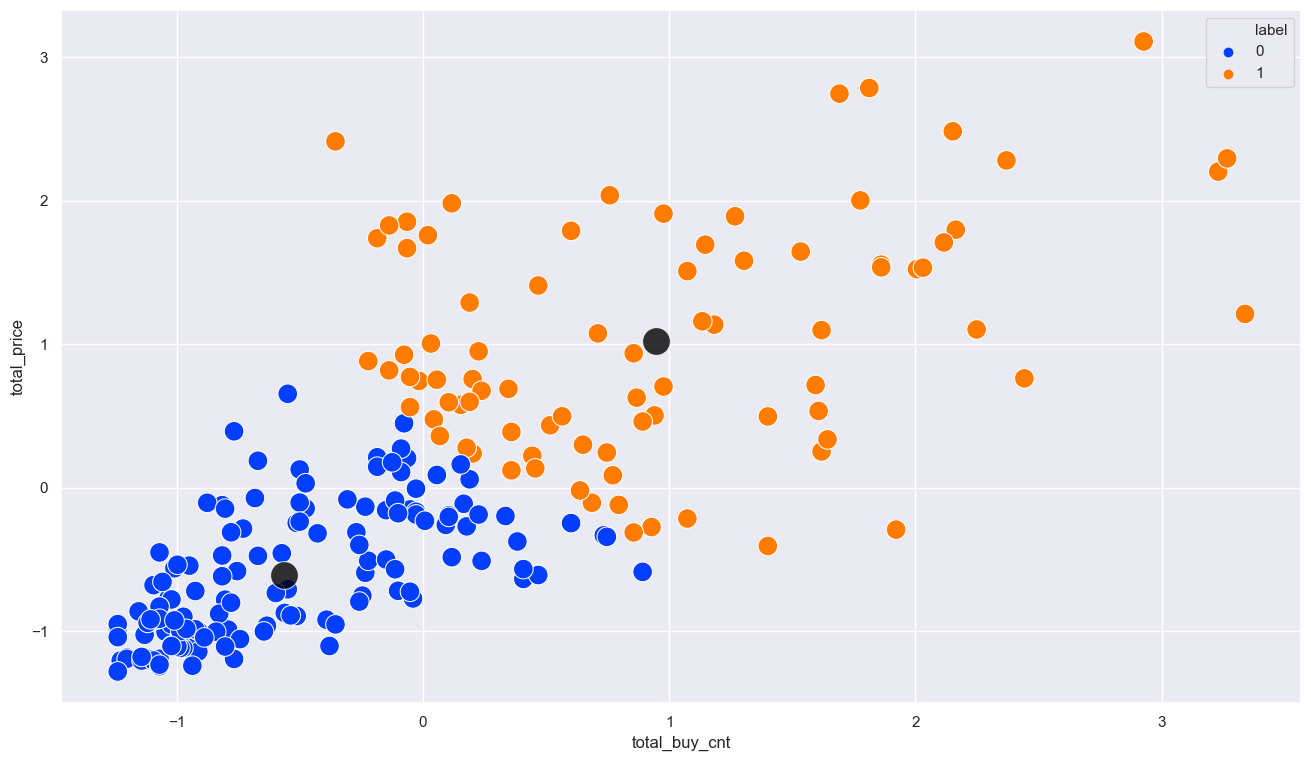

In [14]:
#라벨링 된 데이터를 기준으로 클러스터를 구분해 시각화를 해보고
#Centroid도 함께 표시해 보자

# 각 군집의 중심점
centers = model.cluster_centers_

sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=200, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=400)

In [15]:
scaled_df = scaled_df.drop(['label'], axis=1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:>

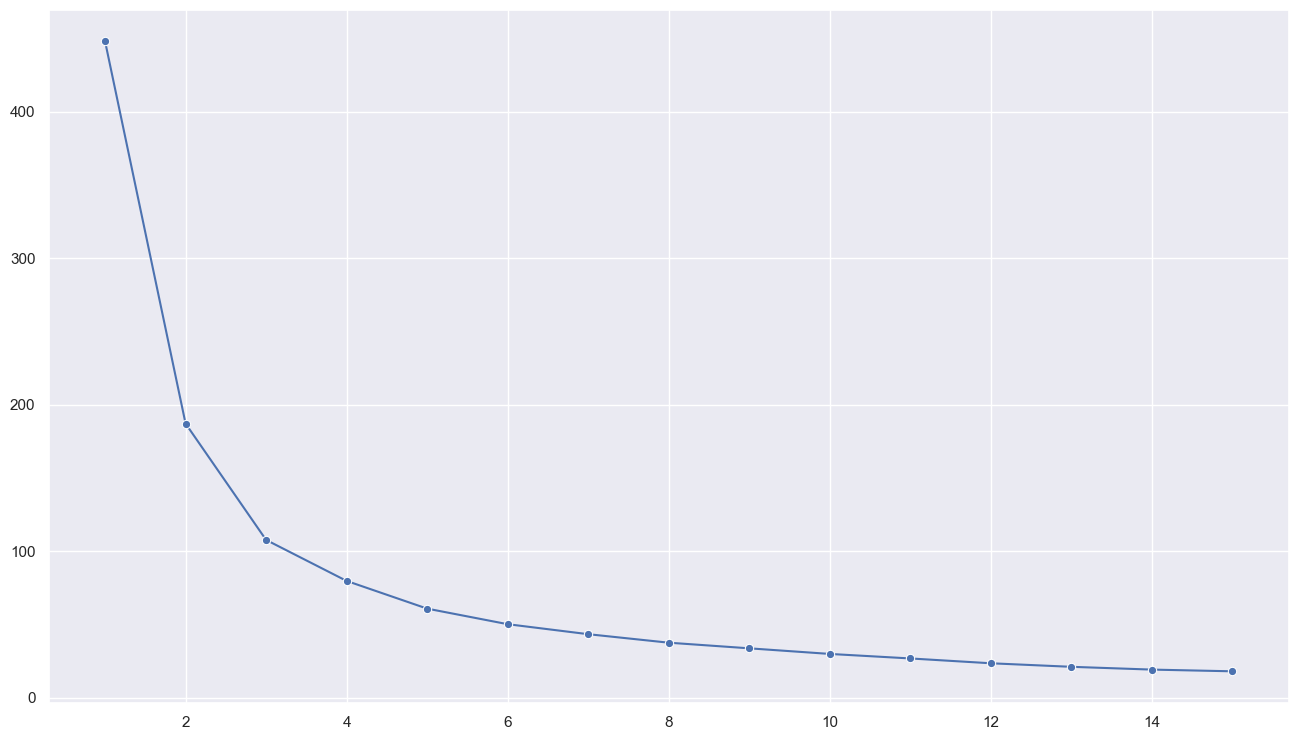

In [16]:
# inertia 값 저장할 리스트
inertias = []     

for k in range(1, 16): # k값의 범위 1~15로 지정
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

# k값에 따른 inertia값 시각화
sns.lineplot(x=range(1, 16), y=inertias, marker='o')

In [17]:
model = KMeans(n_clusters=5, random_state=123)

In [18]:
model.fit(scaled_df)

KMeans(n_clusters=5, random_state=123)

In [19]:
sales_df['label'] = model.predict(scaled_df)
#sales_df에 label 열추가

C:\Users\USER\AppData\Local\Temp\ipykernel_32836\3930000946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['label'] = model.predict(scaled_df)


In [20]:
sales_df

,total_buy_cnt,total_price,label
customer_id,,,
12395,99,430250,1
12427,98,566410,1
12431,122,849900,0
12471,10,97750,3
12472,88,568740,1
...,...,...,...
18144,30,90750,3
18168,243,1533530,2
18225,1,91430,3


In [21]:
#스케일링된 데이터로분석하면 고객의 특성을 정확하게 반영하기어렵다
#그래서 scaled_df로는 클러스터링까지만 진행하고
#실제분석은ㅇ 데이터의 특성이 그대로남아있는 sales_df사용

<AxesSubplot:xlabel='total_buy_cnt', ylabel='total_price'>

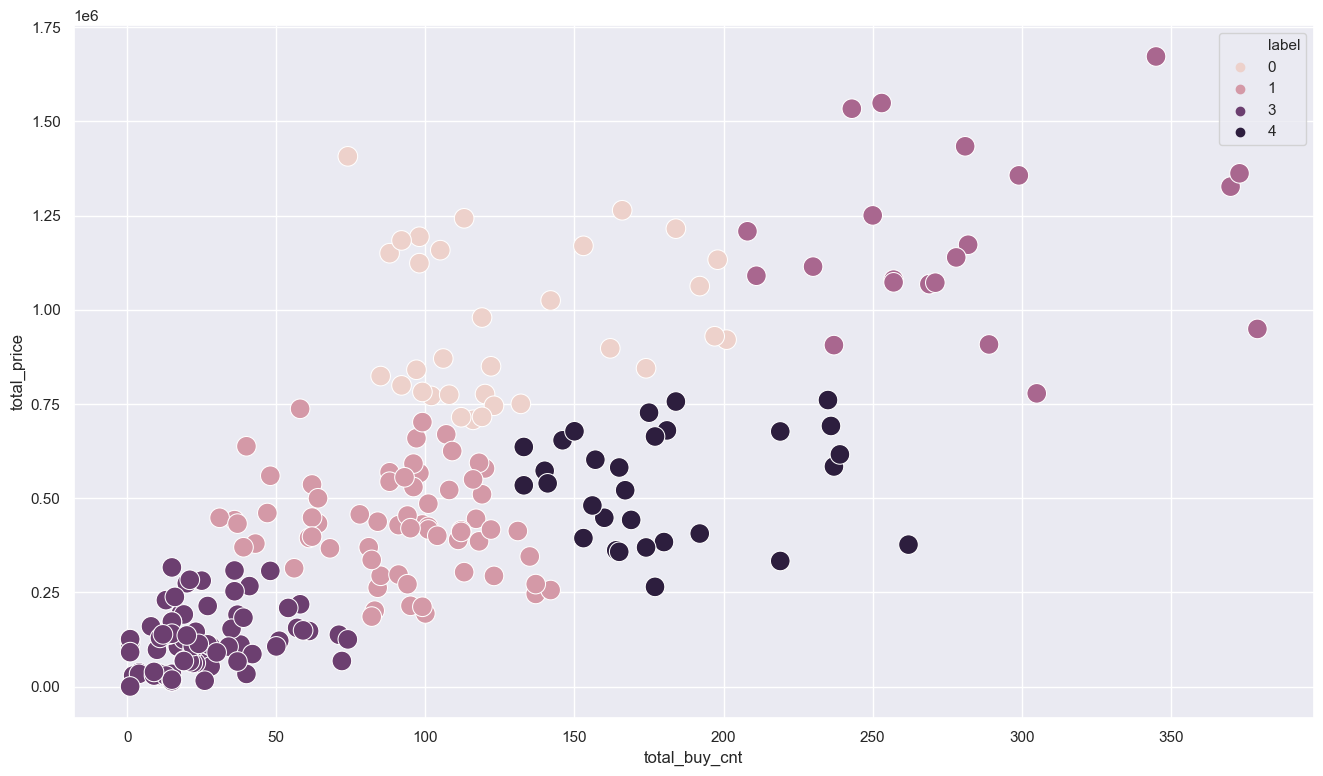

In [22]:
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], hue=sales_df['label'], s=200)
#s는 크기

In [23]:
#각 클러스터에 있는 고객수를 확인해보자
pd.DataFrame(sales_df['label'].value_counts())
#클러스3이 고객이가장많고 클러스터2가 가작적다

,label
3,76
1,66
0,32
4,30
2,21


In [24]:
groupby_df=sales_df.groupby('label').mean()
groupby_df

,total_buy_cnt,total_price
label,,
0,127.781250,9.632231e+05
1,90.363636,4.304198e+05
2,280.333333,1.192479e+06
3,25.460526,1.240047e+05
4,179.533333,5.364160e+05


In [25]:
groupby_df['price_mean'] = groupby_df['total_price'] / groupby_df['total_buy_cnt']
groupby_df

,total_buy_cnt,total_price,price_mean
label,,,
0,127.781250,9.632231e+05,7538.063096
1,90.363636,4.304198e+05,4763.197518
2,280.333333,1.192479e+06,4253.788007
3,25.460526,1.240047e+05,4870.470284
4,179.533333,5.364160e+05,2987.835128


In [26]:
#클러스터2의 고객들은  총 구매 수량과 금액이 많다
#하지만, 개당구매 가격은 적다
#즉 가격이 낮은 물품을 많이 구매한다는 특징이 있는걸로 해석할수있다
#클러스터0의 고객들은 총 구매수량이 많은 편은 아니지만, 구매한 품목의 평균금액은
#높다

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

In [33]:
#모델 학습
#계층적 클러스터링은 linkage()가 사용도니다
#파라미터로 데이터와 어떠한 거리 메소드를 사용할지 지정해줘야한다
#ward거리를 사용
model = linkage(scaled_df, 'ward')

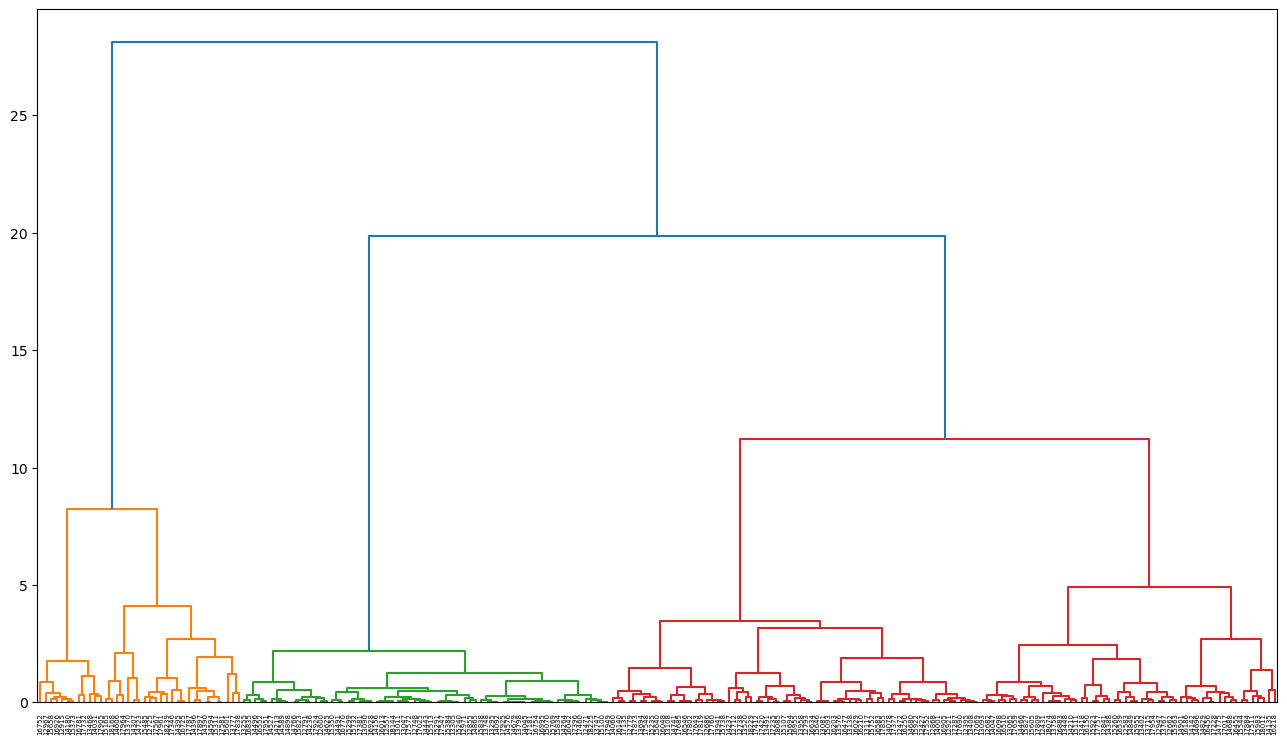

In [35]:
#학습된 결과를 덴드로그램으로 시각화

labelList = scaled_df.index

plt.figure(figsize=(16,9))
plt.style.use("default")

dendrogram(model, labels=labelList)
plt.show()

In [36]:
cluster_num=5

scaled_df['label'] = cut_tree(model, cluster_num)

pd.DataFrame(scaled_df['label'].value_counts())
#클러스터 별로 고객이 몇명있는지

,label
0,67
2,67
1,54
3,25
4,12


<AxesSubplot:xlabel='total_price', ylabel='total_buy_cnt'>

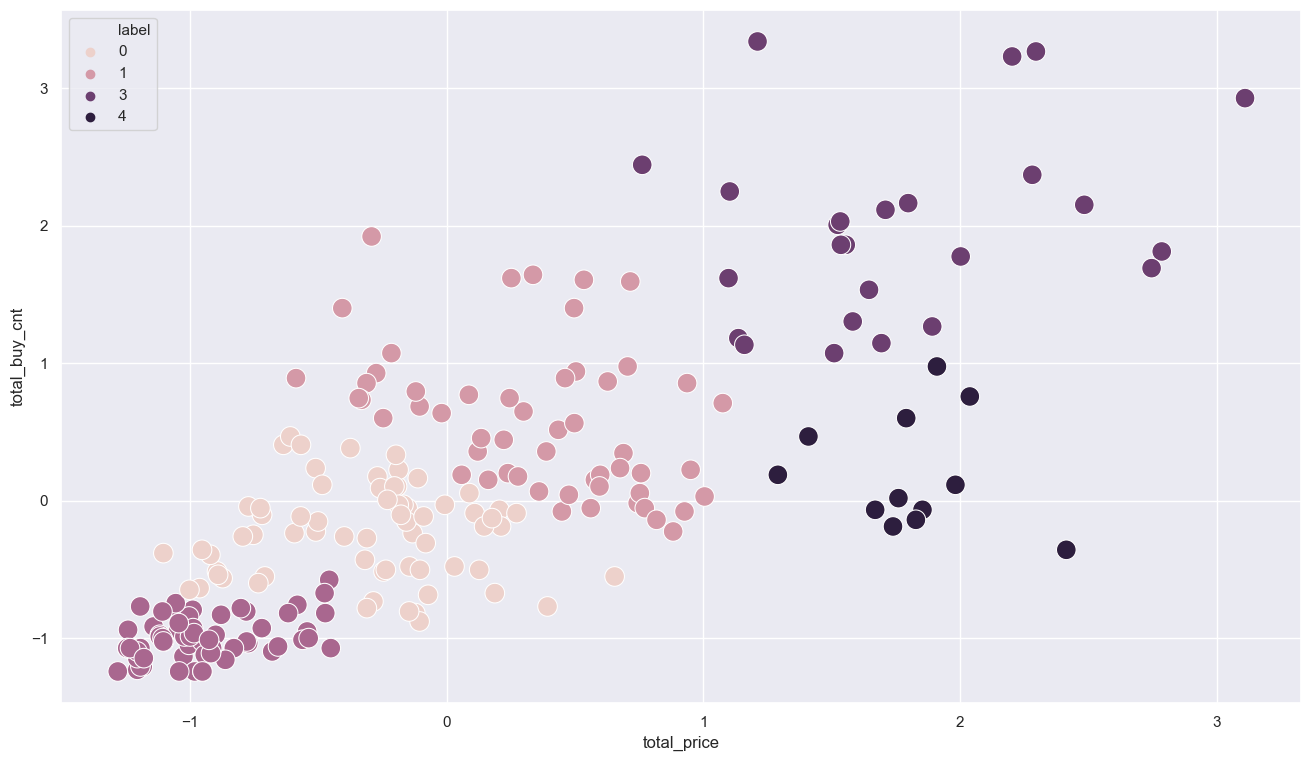

In [38]:
sns.set(style="darkgrid",
        rc = {'figure.figsize':(16,9)})

sns.scatterplot(x=scaled_df['total_price'], y=scaled_df['total_buy_cnt'], hue=scaled_df['label'], s=200)

In [39]:
#계층적 클러스터링의 장점
#모델을 학습시킬때 클러스터의 개수를 미리 가정하지않아도 된다

#k-means는 사전에 정한 k값에 따라 겨로가가 달라졌지만
#계층적 클러스터링은 클러스터의 개수에 상관없이 모델을 학습시킬 수 있다

#클러스터의 개수를 몇 개로 해야할 지 모를 때 유용하게 사용할 수 있다

#계층적 클러스터링은 모든 데이터끼리의 거리를 반복해서 계산해야하기때문에
#많은 연산이 필요하다
#학습 속도가 느리고 대용량 데이터에 적용이 어렵다는 단점이 있다

<AxesSubplot:xlabel='0', ylabel='1'>

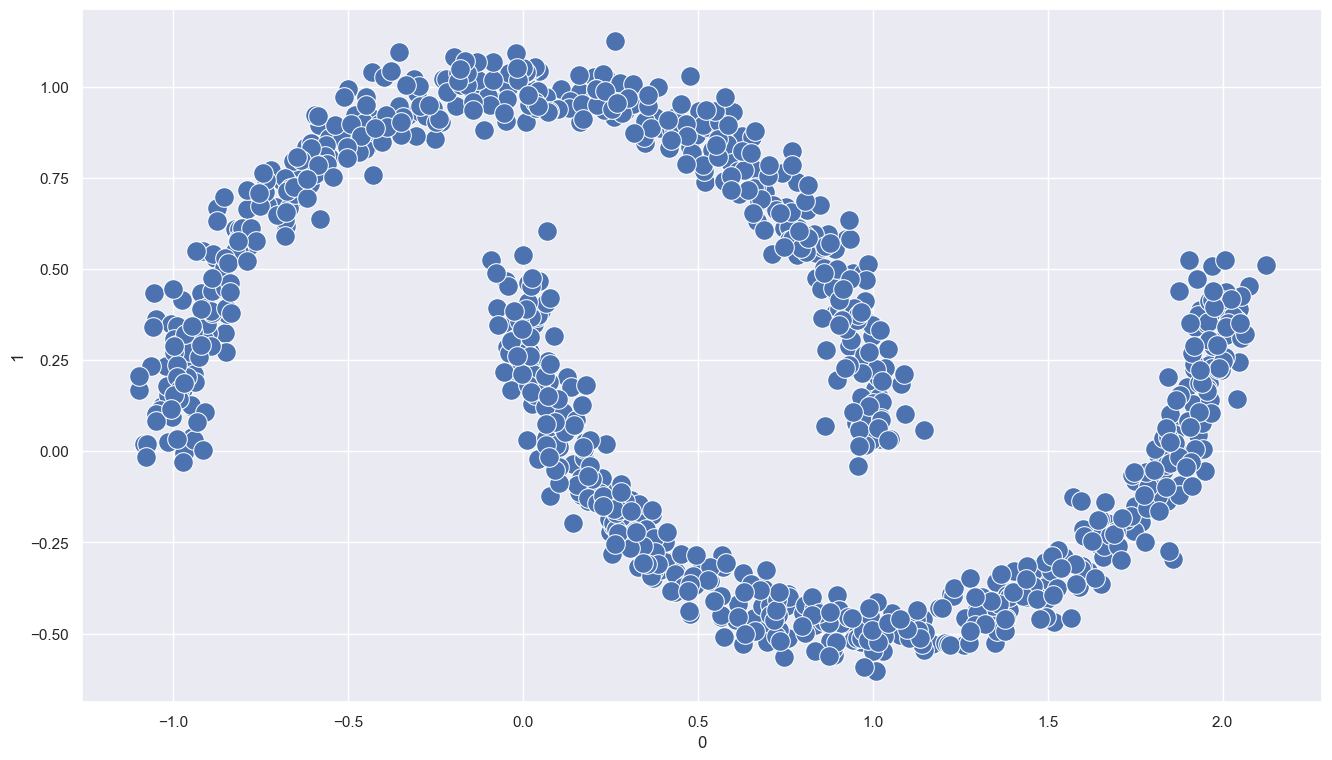

In [44]:
#make_moons()를 사용하면 초승달 모양의
#데이터 분포를 생성할 수 있다
from sklearn.datasets import make_moons
import numpy as np

n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=.05)#noise:잡음의 크기.0이면 정확한 반원을 이룸
df = pd.DataFrame(X)



plt.figure(figsize=(16,9))
sns.scatterplot(x=df[0], y=df[1], marker='o', s=200)

<AxesSubplot:xlabel='0', ylabel='1'>

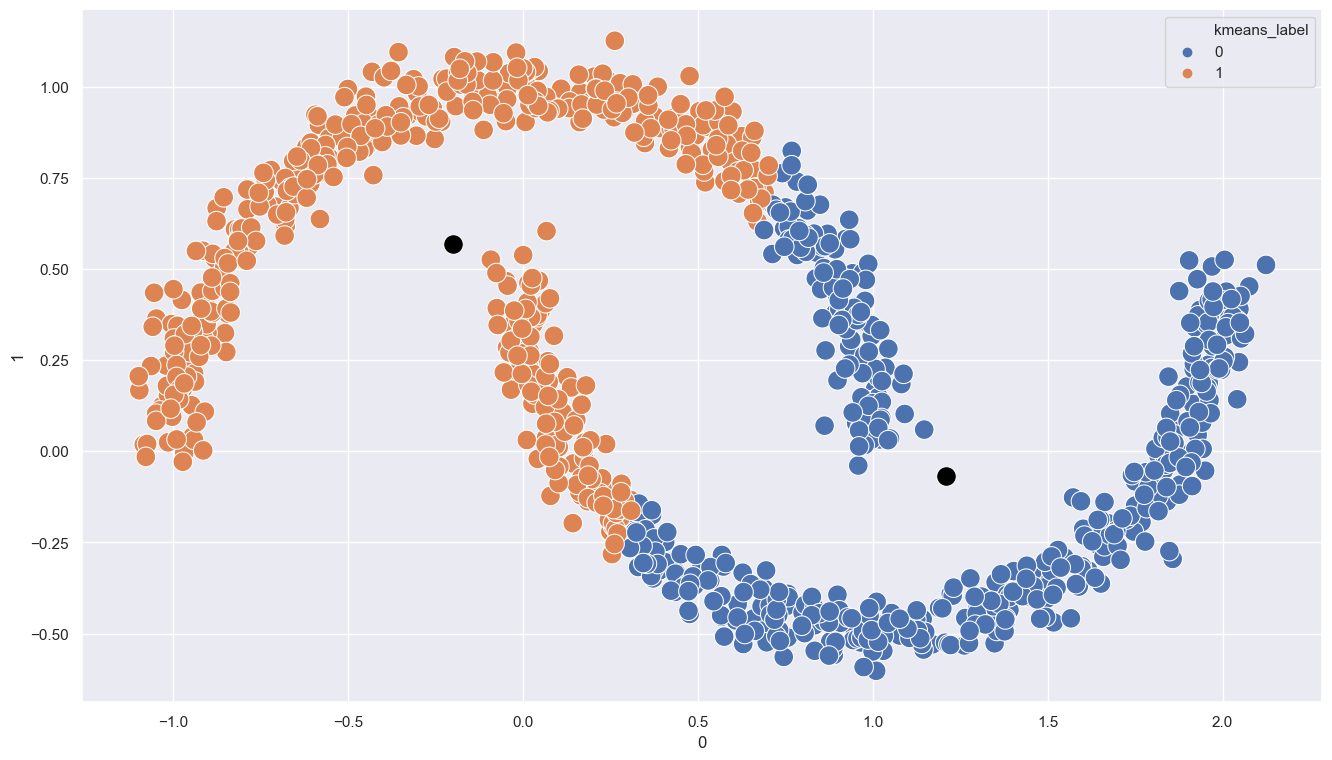

In [45]:
#이 데이터를 k-means와 DBSCAN 각각으로 클러스터링을 해보고
#결과를 비교하자

#먼저 k-means
#k=2

#k-means 모델학습
model = KMeans(n_clusters=2, random_state = 123)
model.fit(df)

#클러스터 라벨링
df['kmeans_label'] = model.predict(df)

#각 군집의 중심점
centers = model.cluster_centers_

#클러스터링 결과 시각화
plt.figure(figsize=(16,9))

sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'] , s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

In [46]:
#Centroid 중심으로 가까운 거리의 데이터가 같은 클러스터로 묶였다
#반달모양으로 구분된 데이터의 특성이 자 반영 되지 못했다

#DBSCAN으로도 클러스터링 해보자

In [47]:
df = df.drop(columns=['kmeans_label'], axis=1)

<AxesSubplot:xlabel='0', ylabel='1'>

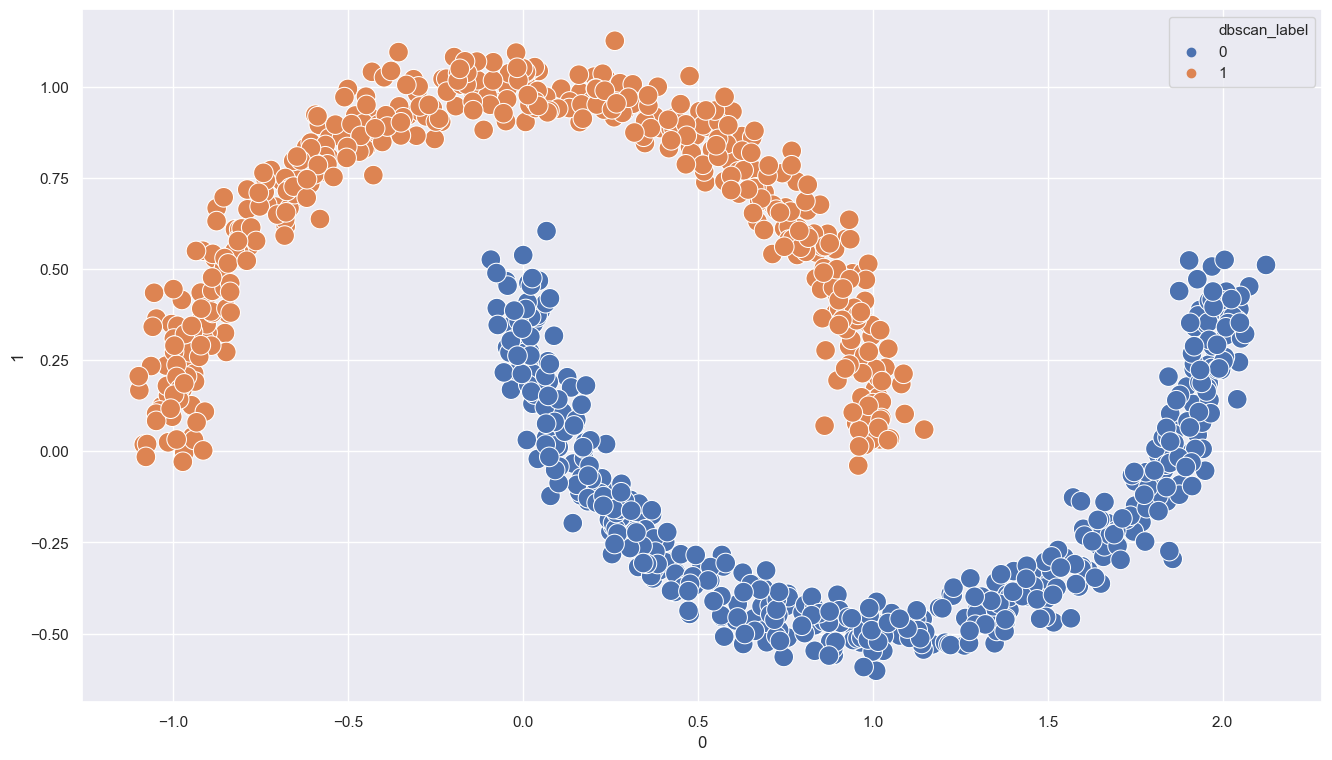

In [48]:
from sklearn.cluster import DBSCAN
eps = 0.1 #반경
min_samples = 5 #최소 데이터 갯수

#DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)

In [49]:
#클러스터를 두 개의 반달 모양으로 잘 구분했다
#DBSCAN은 기하학적인 분포의 데이터를 클러스터링하는데 유용하다

<AxesSubplot:xlabel='0', ylabel='1'>

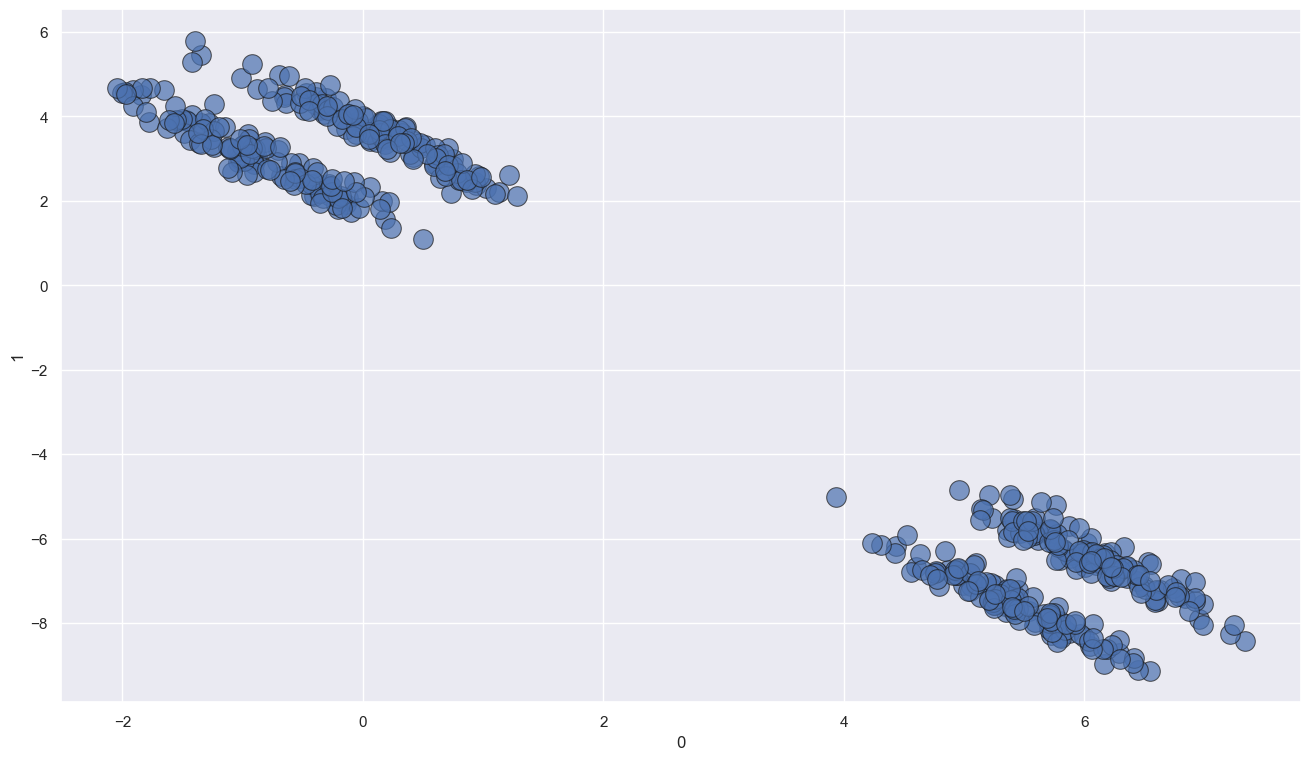

In [50]:
#make_blobs로 생성한 데이터에 특수 행렬을 곱해주면 타원형으로 길게 늘어진 데이터를 생성할수 있다
from sklearn.datasets import make_blobs

n_samples = 500 #샘플 데이터 갯수
centers = 4 #클러스터 개수
cluster_std = 0.75 #클러스터 내 표준편차
random_state = 13 #샘플 데이터 고정

data, clusters = make_blobs(n_samples=n_samples, centers = centers, cluster_std = cluster_std, random_state=random_state)

tf = [[0.6, -0.6], [-0.4, 0.8]]
data_tf = data @ tf
df = pd.DataFrame(data_tf)

sns.scatterplot(x=df[0], y=df[1], alpha = 0.7, edgecolor='k', s=200)

<AxesSubplot:xlabel='0', ylabel='1'>

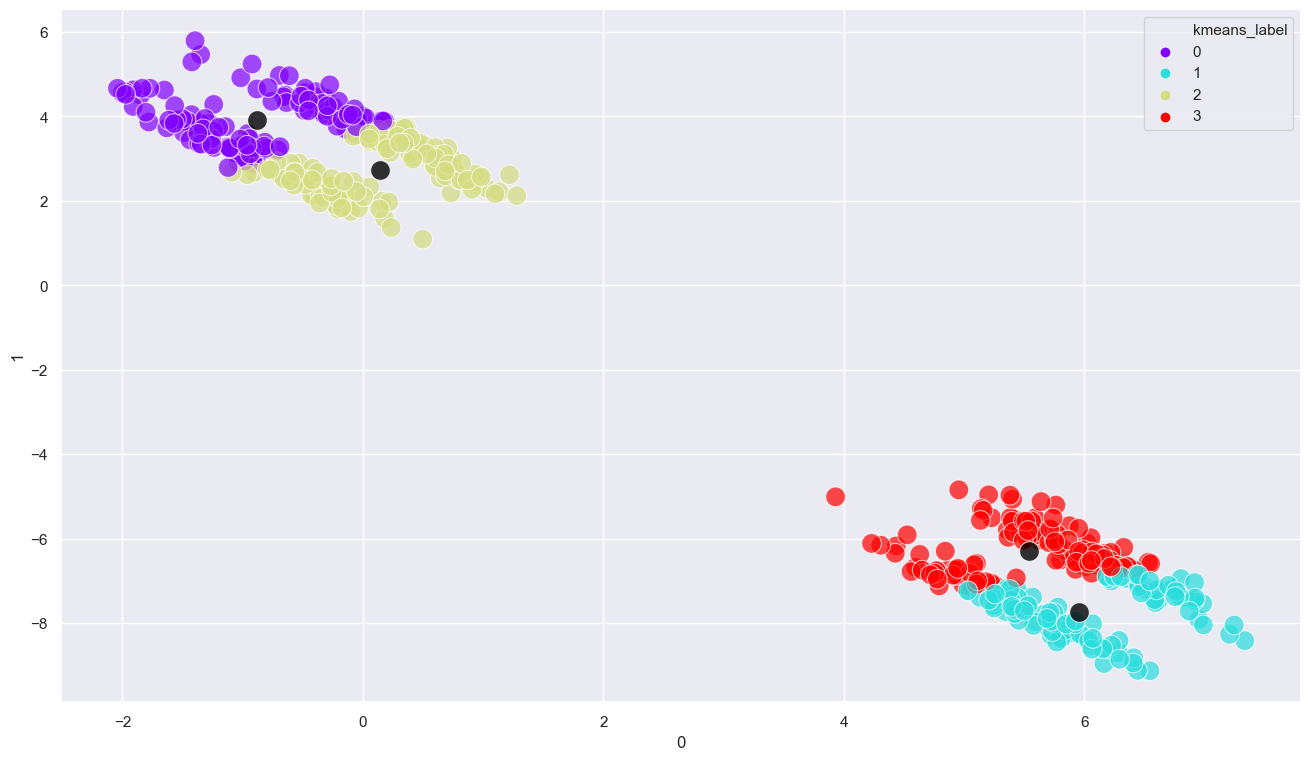

In [52]:
#먼저 k-means학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_ # 각 클러스터의 Centorid

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=200)

In [53]:
#타원형의 데이터는 k-means로 클러스터링이 잘 되지 않는다
#그럼 GMM으로 클러스터링 한 결과는?

<AxesSubplot:xlabel='0', ylabel='1'>

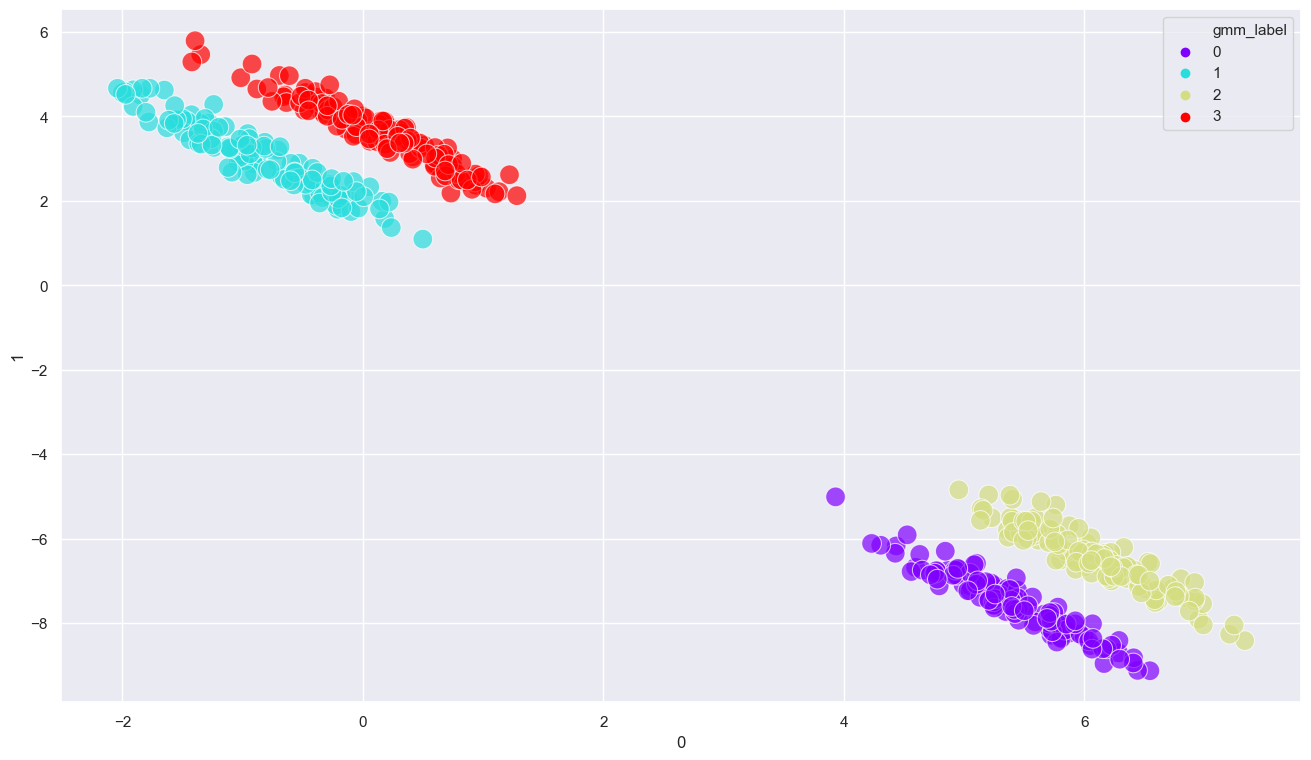

In [54]:
df = df.drop(columns=['kmeans_label'], axis=1)

from sklearn.mixture import GaussianMixture

n_components = 4 #분포 개수
random_state = 10 #모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)
model.fit(df)
df['gmm_label'] = model.predict(df)

sns.scatterplot(x=df[0], y=df[1], hue=df['gmm_label'], palette='rainbow', alpha=0.7, s=200)